In [7]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from PIL import Image
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [8]:
num_classes = 10
classes = {0:"airplane", 1:"automobile", 2:"bird",3:"cat", 4:"deer",\
           5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
y_train_onehot = to_categorical(y_train, num_classes) 

x_test = x_test.astype('float32')/255
y_test_onehot = to_categorical(y_test, num_classes) 

print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)
print('y_train_onehot shape:', y_train_onehot.shape)
print('x_test shape:', x_test.shape)
print('y_train shape', y_test.shape)
print('y_test_onehot shape:', y_test_onehot.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape (50000, 1)
y_train_onehot shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_train shape (10000, 1)
y_test_onehot shape: (10000, 10)


In [9]:
nn = Sequential([
    Flatten(), 
    Dropout(0.2),
    #input_shape=(32,32,3)
    Dense(1000, activation='relu'),
    Dense(10,activation='softmax'),
    Dense(units=10),
    Activation('softmax')
])
nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
nn.fit(x_train, y_train, epochs=50)
nn.evaluate(x_test,y_test)
y_pred = nn.predict(x_test)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3141 - accuracy: 0.1002
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3029 - accuracy: 0.0969
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3029 - accuracy: 0.0970
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3029 - accuracy: 0.1028
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.0998
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3030 - accuracy: 0.0980
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.0969
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3029 - accuracy: 0.0998
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3029 - accuracy: 0.0986
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - 

In [11]:
print(nn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 3,083,120
Trainable params: 3,083,120
Non-trainable params: 0
____________________________________________

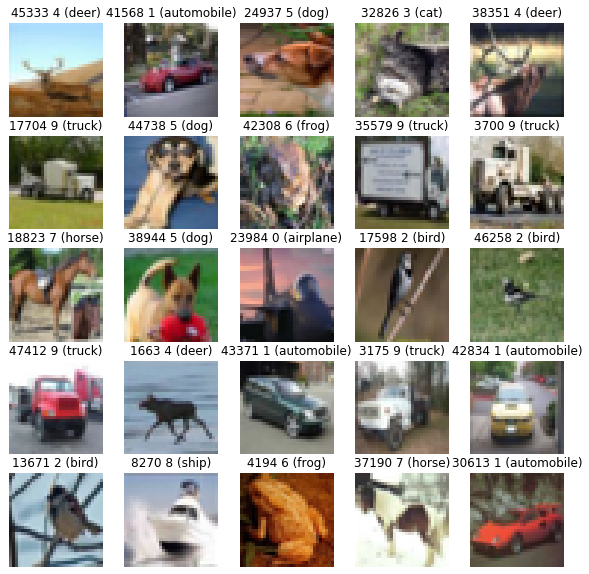

In [12]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(x_train[i_rand])
    plt.title(str(i_rand) + " " + str(y_train[i_rand][0])\
              + " (" + classes[y_train[i_rand][0]] + ")")